Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **35 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Enjui Chang"
COLLABORATORS = ""

---

# CS110 Pre-class Work - The rod-cutting problem

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length $n$ of a rodand, a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1 [time estimate: 5 minutes] 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [2]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    q : float
        The optimal revenue
        
    """
    # if the length of the road is 0, revenue is 0
    if n == 0:
        return 0
    
    # intialize the sentinels
    q = -float("inf")
    
    # recrusion through every possibility
    for i in range(n):
        q = max(q,p[i]+cut_rod(p,n-i-1))
    
    return q
    

In [3]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2 [time estimate: 10 minutes]

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [4]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    r : list of floats
        The maximum revenues. r[i] gives the maximum revenue for a rod
        of length i. As such:
        
            >>> r[0] = 0
            >>> len(r) == n + 1
            
    s : list of ints
        The optimal sizes of the first piece to cut off. Also make sure 
        that:
            
            >>> s[0] = 0
            >>> len(s) == n + 1
            
    """
    # create lists for the revenue and solution
    r = [i for i in range(n+1)]
    s = [i for i in range(n+1)]
    
    # dynamic programming using the bottom-up approach
    for j in range(1,n+1):
        q = -float("inf")
        
        # dividing the remainder of the rod
        for i in range(j):
            
            # find the maximum revenue of each combination
            if q < p[i]+r[j-i-1]:
                q = p[i]+r[j-i-1]
                s[j]=i+1
        # store the maximum revenue
        r[j]=q
    return r, s

In [5]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the revenue 
        (in USD, for example) the company earns selling a rod of length i+1
    n : int
        Length of the rod
    
    Returns
    -------
    sol : a list of ints
        Indicates how to cut the rod. Cutting the rod with the lengths
        given in sol gives the optimal revenue.
        
            >>> print_cut_rod_solution(p,0) == []
            
    """
    sol = []
    
    # print an empty list when the length is 0
    if n == 0:
        return sol
    
    r,s = extended_bottom_up_cut_rod(p,n)
    
    # store the solution for every s
    while n > 0:
        sol.append(s[n])
        n = n-s[n]
    return sol

In [6]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1 [time estimate: 1 minute]

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for questions 2 and 3 below.


In [7]:
import numpy as np
def generate_price_list(n):
    """
    Generates a price list of length n
    
    Parameters
    ----------
    n : int
        Length of the list, must be positive
    
    Returns
    -------
    p : list
        The ordered price list for each rod cut
        
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p


## Question 2 [time estimate: 5 minutes]

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


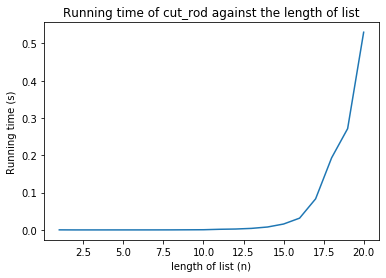

In [12]:
import time
import matplotlib.pyplot as plt

# intitialize storage and iteration
time_storage = []
iteration = 10

# run different rod lengths
for n in range(1,21):
    
    # generate random list
    p = generate_price_list(n)
    
    # temporary storage for each iteration
    temp_storage = []
    
    # iterate the runtime
    for i in range(iteration):
        
        # calculate the runtime
        start = time.time()
        cut_rod(p,n)
        end = time.time()
        temp_storage.append(end-start)
    
    # average the runtime
    time_storage.append(sum(temp_storage)/len(temp_storage))

# plot the graph   
n = [i for i in range(1,21)]
f1 = time_storage

plt.plot(n,time_storage)
plt.xlabel("length of list (n)")
plt.ylabel("Running time (s)")
plt.title("Running time of cut_rod against the length of list")
plt.show()

In [9]:
print(f1)

[1.4781951904296875e-06, 2.09808349609375e-06, 1.0609626770019531e-05, 7.510185241699219e-06, 1.5115737915039062e-05, 3.020763397216797e-05, 6.0272216796875e-05, 0.00012006759643554688, 0.0002395153045654297, 0.0008018016815185547, 0.0028468847274780275, 0.0031660795211791992, 0.004726290702819824, 0.008257484436035157, 0.015515685081481934, 0.03426170349121094, 0.07308692932128906, 0.1470184087753296, 0.2660036563873291, 0.5865463733673095]


## Question 3 [time estimate: 2 minutes]

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

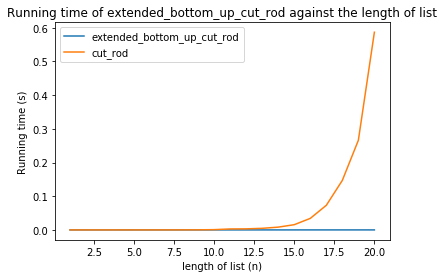

In [10]:
# intitialize storage and iteration
time_storage = []
iteration = 1000

# run different rod lengths
for n in range(1,21):
    
    # generate random list
    p = generate_price_list(n)
    
    # temporary storage for each iteration
    temp_storage = []
    
    # iterate the runtime
    for i in range(iteration):
        
        # calculate the runtime
        start = time.time()
        extended_bottom_up_cut_rod(p,n)
        end = time.time()
        temp_storage.append(end-start)
    
    # average the runtime
    time_storage.append(sum(temp_storage)/len(temp_storage))

# plot the graph   
n = [i for i in range(1,21)]
f2 = time_storage
plt.plot(n,time_storage, label ="extended_bottom_up_cut_rod")
plt.plot(n,f1, label = "cut_rod")
plt.xlabel("length of list (n)")
plt.ylabel("Running time (s)")
plt.title("Running time of extended_bottom_up_cut_rod against the length of list")
plt.legend()
plt.show()

## Question 4 [time estimate: 2 minutes]

Contrast both curves. What can you conclude?

We see an exponential ($k\times 2^n$) increase (doubling) in the curve representing cut_rod. In contrast, the curve for extended_bottom_up_cut_rod seems more like polynomial ($n^k$, k is greater than 1 but fairly small), or even a linear with a smaller order of growth.

## Part C - After completing your experiments above, answer the following questions:

## Question 1 [time estimate: 5 minutes]
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

For every additional length (n+1), the time it takes doubles, therefore, using $k\times2^20 = 0.586$, we can estimate the $k$ value and extend that to find the $n$ when the runtime is a million years.

Using WolframAlpha, I found $k$ of $k\times2^{20} = 0.586$ as $5.593×10^{-7}$ (sec). Hence, equating $5.593×10^{-7}\times2^n$ to a million years ($1000000\times60\times60\times24\times365$) will give me the answer for $n$.

Using WolframAlpha, the answer is $65.611$, around the length of 66 (N=66).

## Question 2 [time estimate: 5 minutes]
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

In [11]:
n = 66
iteration = 1000
# generate random list
p = generate_price_list(n)

# temporary storage for each iteration
temp_storage = []

# iterate the runtime
for i in range(iteration):

    # calculate the runtime
    start = time.time()
    extended_bottom_up_cut_rod(p,n)
    end = time.time()
    temp_storage.append(end-start)

# average the runtime
result=sum(temp_storage)/len(temp_storage)
result

0.00031085205078125

The time needed to calculate a rod of length N (66) only takes 0.0003 second, miniscule comapred to the previous answer. 

## [Optional]  Question 3 [time estimate: 5 minutes]
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE